In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#read csv files in data
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test= pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [ ]:
#convert data types where coluhmns have values yes and no to 1 and 0
train = train.replace({'yes': 1, 'no': 0})
test = test.replace({'yes': 1, 'no': 0})

In [ ]:
#  Import the necessary libraries
from sklearn.preprocessing import LabelEncoder

In [ ]:

#Create an instance of LabelEncoder
lbl = LabelEncoder()

In [ ]:

#Fit the label encoder on the combined data of train and test datasets
lbl.fit(list(train['ecology'].values) + list(test['ecology'].values))

LabelEncoder()

In [ ]:

#Convert the 'ecology' column in the train dataset
train['ecology'] = lbl.transform(list(train['ecology'].values))

In [ ]:

#Convert the 'ecology' column in the test dataset
test['ecology'] = lbl.transform(list(test['ecology'].values))

In [ ]:
#do label encoding for prodcut type as well
lbl.fit(list(train['product_type'].values) + list(test['product_type'].values))
train['product_type'] = lbl.transform(list(train['product_type'].values))
test['product_type'] = lbl.transform(list(test['product_type'].values))

In [ ]:
train.drop(columns=['sub_area'], inplace=True)
test.drop(columns=['sub_area'], inplace=True)

In [ ]:
X = train.drop(columns=['price_doc'])
y = train[['price_doc']]

In [ ]:
#save row id in a dataframe
row_id = test['row ID']
#drop it from test now
test = test.drop(columns=['row ID'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
scaler = MinMaxScaler()

#Fit the scaler and transform X_new
X = scaler.fit_transform(X)


In [ ]:
test = scaler.fit_transform(test)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Use L2 regularization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(271, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Adding Batch Normalization
model.Dropout(0.5),  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Adding Batch Normalization
model.Dropout(0.3),  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Adding Batch Normalization
model.Dropout(0.3),  # Dropout layer to prevent overfitting
model.add(Dense(1))  # Output layer

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(250, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
    ])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Compile the model with adjusted learning rate
from tensorflow.keras.optimizers import Adam

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test, y_test),callbacks=[early_stopping])

dict_keys(['loss', 'val_loss'])
[684658723389440.0, 619973496012800.0, 481138510397440.0, 317057203699712.0, 216144430497792.0, 189628963356672.0, 184837843451904.0, 181924194680832.0, 181020322168832.0, 180244073938944.0, 178724746035200.0, 178365730390016.0, 179677054369792.0, 178246763151360.0, 176899301048320.0, 177221239046144.0, 176111291990016.0, 176019755499520.0]
[671186082070528.0, 564011078778880.0, 383144335245312.0, 243665960173568.0, 180276688846848.0, 167911763214336.0, 166943701073920.0, 189995008655360.0, 165957116887040.0, 165301849161728.0, 175606801104896.0, 165435899117568.0, 164251410890752.0, 170304848527360.0, 171769868582912.0, 168440765612032.0, 165194609197056.0, 166813342105600.0]


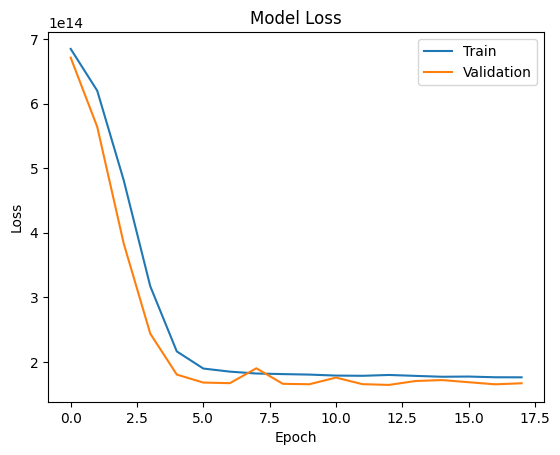

1702/1702 [==============================] - 5s 3ms/step - loss: 164251410890752.0000
Root Mean squared error: 12816060.66
2431/2431 [==============================] - 8s 3ms/step


In [ ]:
# Print the training and validation loss
print(history.history.keys())  # To see what's available in the history object

# Print training loss
print(history.history['loss'])

# Print validation loss
print(history.history['val_loss'])
import matplotlib.pyplot as plt

# Assuming 'history' is the object containing training history

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# Evaluate the model
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print("Root Mean squared error: %.2f" % rmse)
# Predict on the test set
price_doc = model.predict(test).flatten()

In [ ]:
#Create a DataFrame for the predictions
predictions_df = pd.DataFrame(price_doc, columns=['price_doc'])

#Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'row ID', row_id)

#Save the predictions to a CSV file
predictions_df.to_csv('dme.csv', index=False)